# [Global Ice Velocities](https://its-live.jpl.nasa.gov/)

<div align="left"> 
<img src='./img/header.png' height='260px'/>
</div>

The Inter-mission Time Series of Land Ice Velocity and Elevation (ITS_LIVE) project facilitates ice sheet, ice shelf and glacier research by providing a globally comprehensive and temporally dense multi-sensor record of land ice velocity and elevation with low latency.

### Velocity granules
    
All image pairs are processed using the JPL autonomous Repeat Image Feature Tracking algorithms (auto-RIFT), first presented in (Gardner et al., 2018). Release v00.0 of the ITS_LIVE velocity mosaics use auto-RIFT Version 1. This ITS_LIVE data set uses surface displacements generated by image pairs  in repeat orbits, and image pairs generated by overlap areas of adjacent or near-adjacent orbits. Image pairs collected from the same satellite position ("same-path-row") are searched if they have a time separation of fewer than 546 days. This approach was used for all satellites in the Landsat series (L4 to L8). To increase data density prior to the launch of Landsat 8, images acquired from differing satellite positions, generally in adjacent or near-adjacent orbit swaths ("cross-path-row"), are also processed if they have a time separation between 10 and 96 days and an acquisition date prior to 14 June 2013(beginning of regular Landsat 8 data). Feature tracking of cross-path-row image pairs produces velocity fields with a lower signal-to-noise ratio due to residual parallax from imperfect terrain correction. Same-path-row and cross-path-row preprocessed pairs of images are searched for matching features by finding local normalized cross-correlation (NCC) maxima at sub-pixel resolution by oversampling the correlation surface by a factor of 16 using a Gaussian kernel. A sparse grid pixel-integer NCC search (1/16 of the density of full search grid) is used to determine areas of coherent correlation between image pairs. For more information, see the Normalized Displacement Coherence (NDC) filter described in Gardner et al. (2018)


### Coverage

Scene-pair velocities generated from satellite optical and radar imagery.

* Coverage: All land ice
* Date range: 1985-present
* Resolution: 240m
* Scene-pair separation: 6 to 546 days 

In [5]:
%%capture
%matplotlib widget

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

from scripts.velocity_widget import ITSLIVE

matplotlib.rcParams['figure.figsize'] = [8, 4]
matplotlib.rcParams["figure.autolayout"] = True

velocity_widget = ITSLIVE()

In [6]:
%%html
<style>
.jupyter-widgets.widget-tab > .p-TabBar .p-TabBar-tab {
    flex: 0 1 200px
}
</style>

#  matplotlib.style.available

### Getting the time series directly from the Zarr cube, no web services involved.

In [ ]:
point = [-140.5, 60.03]
cube, ds, projected_coord = velocity_widget.dct.get_timeseries_at_point(
    point, "4326", variables=["v","satellite_img1","mid_date", "date_dt"]
)

## Plotting ITS_LIVE velocity time series 

original xy [-140.5, 60.03] 4326 maps to datacube (-3304403.176649519, 318177.83674050594) EPSG:3413


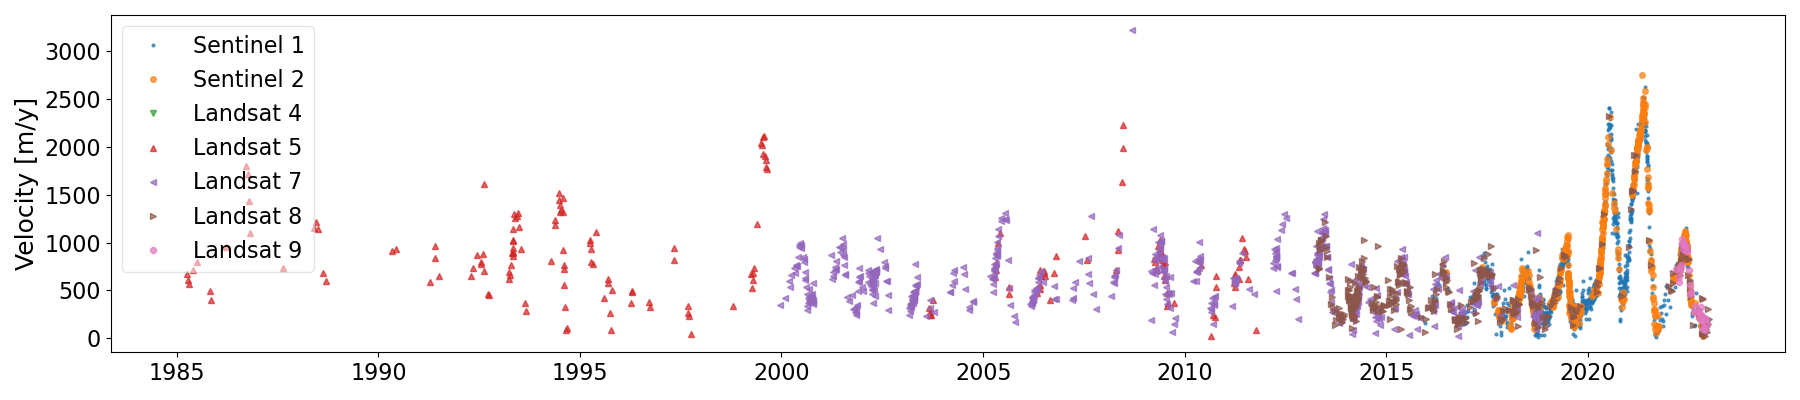

In [57]:


fig = plt.figure(figsize=(18,4))
fig.subplots_adjust(bottom=-0.15,top=1.2)
# ax = fig.add_subplot()

# ax = fig.add_subplot(projection="3d")
# ax.set_box_aspect(aspect=(8, 1, 1))
ax = fig.add_subplot()

sat_label_dict = {
    "1": "Sentinel 1",
    "2": "Sentinel 2",
    "4": "Landsat 4",
    "5": "Landsat 5",
    "7": "Landsat 7",
    "8": "Landsat 8",
    "9": "Landsat 9",
}

sat = np.array([x[0] for x in cube["satellite_img1"].values])
# sat = np.array([str(int(x)) for x in cube["satellite_img1"].values])
sats = np.unique(sat)

max_dt = 60
min_dt = 7
dt = cube["date_dt"].values
dt = dt.astype(float) * 1.15741e-14


for c, z, m in zip(plt.cm.tab10.colors, sat_label_dict, matplotlib.markers.MarkerStyle.filled_markers):
    xs = cube["mid_date"][ (sat == z) & (dt >= min_dt) & (dt <= max_dt) ].values
    ys = ds["v"][ (sat == z) & (dt >= min_dt) & (dt <= max_dt) ]
    ax.plot(xs, ys,  marker=m, linestyle='None', markersize = 4.0, color=c, alpha=0.7, label=sat_label_dict[z])


years = ax.get_xticklabels()
for item in (years ):
    item.set_fontsize(16)
    # item.set_rotation(90)

speed = ax.get_yticklabels()
for item in (speed ):
    item.set_fontsize(16)

ax.xaxis.set_label_text("")
ax.yaxis.set_label_text("Velocity [m/y]", size=18)


ax.legend(fontsize=16, loc="upper left", fancybox=True, framealpha=0.5)
plt.tight_layout()

In [58]:
ax.figure.savefig(f"time-series-{str(point[0])}-{str(point[1])}.png", dpi=300, transparent=True)

### Interactive Widget

In [ ]:
# We render the ui
velocity_widget.display(mobile=False, projection="Global")